In [20]:
from massexport import getratio, getanalytics

ratio = False
#models = ["m2m-100", "mbart", "nllb"]
#unify_occupations(models)

mbart = getanalytics("mbart") if not ratio else getratio("mbart")
nllb = getanalytics("nllb") if not ratio else getratio("nllb")
m2m = getanalytics("m2m-100") if not ratio else getratio("m2m-100")

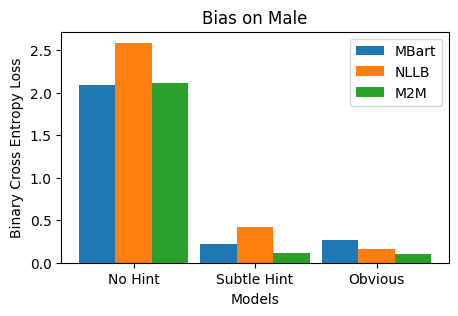

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def plot(gender):
    N = 3
    ind = np.arange(N)
    plt.figure(figsize=(5, 3))
    width = 0.3
    plt.bar(ind, mbart[gender], width, label='MBart')
    plt.bar(ind + width, nllb[gender], width, label='NLLB')
    plt.bar(ind + 2 * width, m2m[gender], width, label='M2M')

    plt.xlabel('Models')
    plt.ylabel("Binary Cross Entropy Loss")
    plt.title(f'Bias on {gender}')
    plt.xticks(ind + width, ('No Hint', 'Subtle Hint', 'Obvious'))
    plt.legend(loc='best')
    plt.show()

plot("Male")

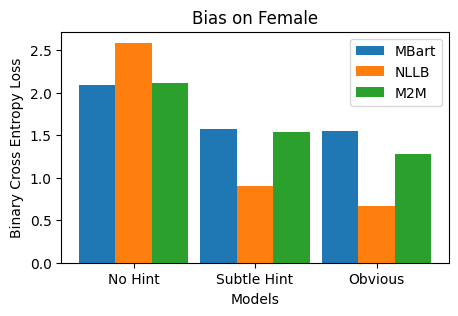

In [22]:
plot("Female")

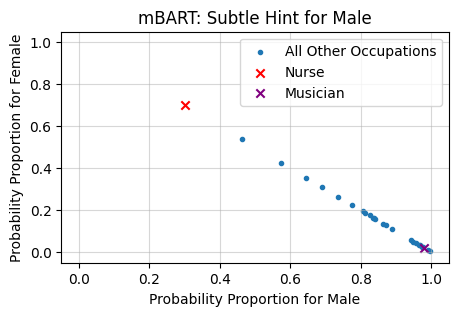

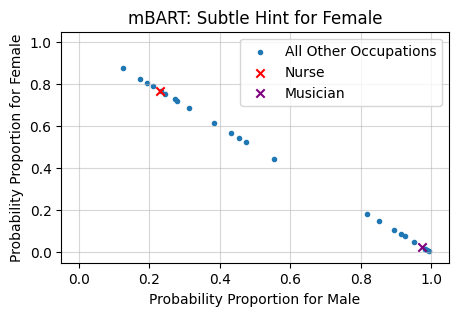

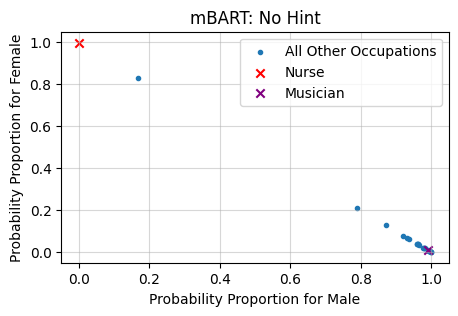

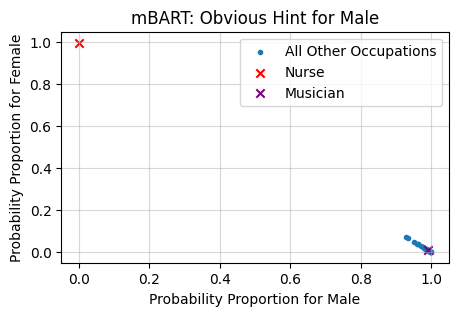

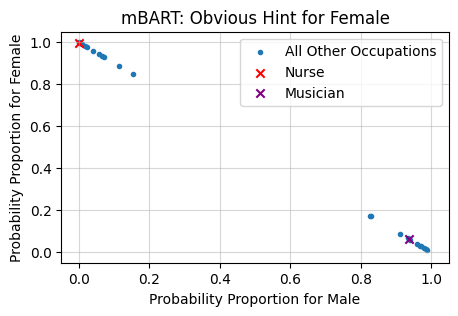

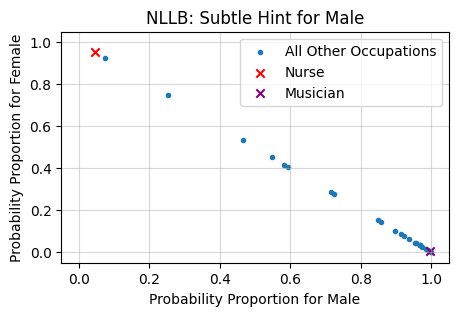

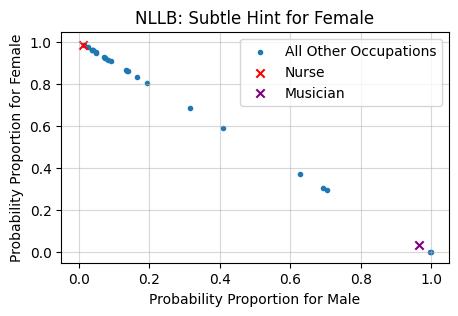

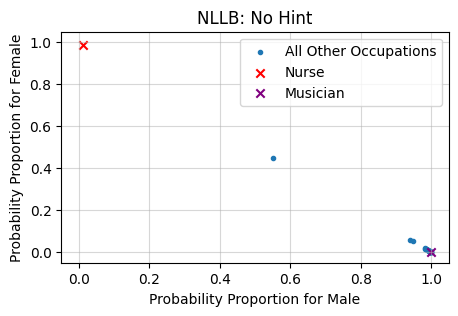

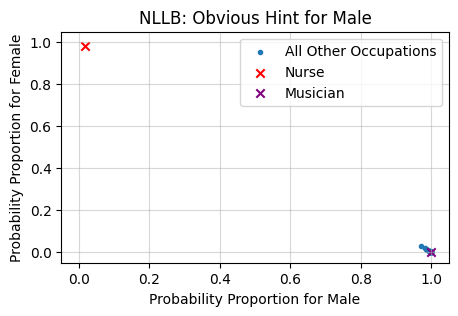

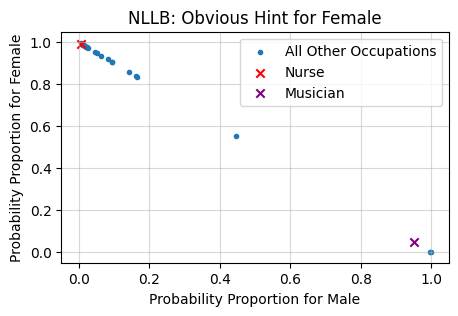

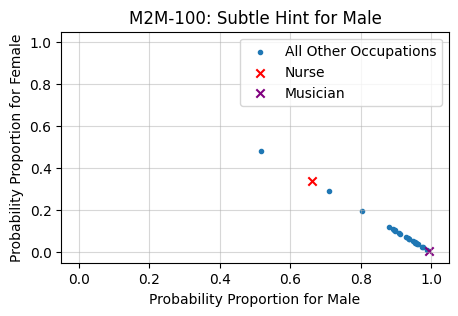

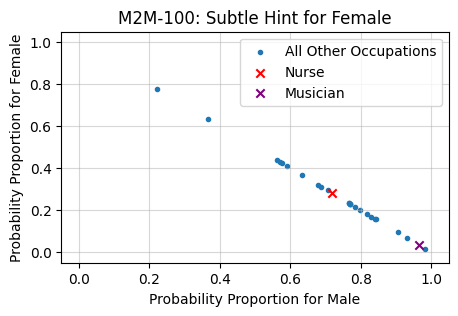

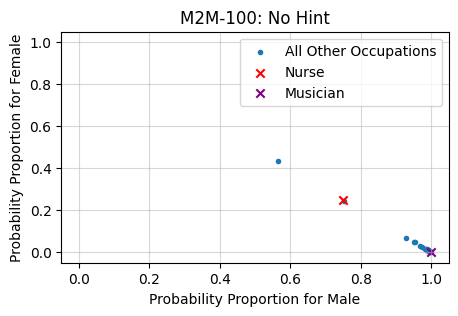

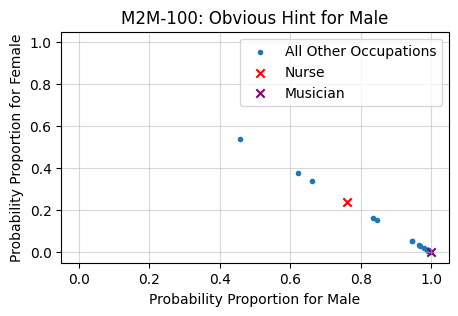

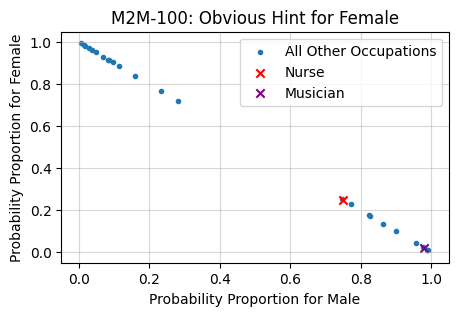

In [16]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5, 3)

def getvals(model, title = None):
    path = Path.cwd() / "probabilities" / model
    
    file = path / "Merged-Prob_bce.xlsx"
    sheets = pd.ExcelFile(file).sheet_names
    dfs = pd.read_excel(file, sheet_name=sheets)
    titles = {
        "obv (M)": "Obvious Hint for Male",
        "obv (F)": "Obvious Hint for Female",
        "nohints": "No Hint",
        "hints (M)": "Subtle Hint for Male",
        "hints (F)": "Subtle Hint for Female",
    }
    
    for sheetname, sheet in dfs.items():
        sheet = sheet.set_index("Unnamed: 0")
        sheet = sheet.drop("loss", axis = 0)
        df = pd.DataFrame()
        df["Male"] = sheet[[i for i in sheet.columns if "Male" in i]].mean(axis = 1)
        df["Female"] = sheet[[i for i in sheet.columns if "Female" in i]].mean(axis = 1)
        male = df["Male"]
        female = df["Female"]
        nurse = (male["Nurse"], female["Nurse"])
        musician = (male["Musician"], female["Musician"])
        male = male.drop(["Nurse", "Musician"])
        female = female.drop(["Nurse", "Musician"])
        plt.scatter(male, female, marker = ".", c = "C0", label = "All Other Occupations")
        plt.scatter(*nurse, marker = "x", c = "red", label = "Nurse")
        plt.scatter(*musician, marker = "x", c = "purple", label = "Musician")
        plt.title(f"{title}: {titles[sheetname]}")
        plt.xlabel("Probability Proportion for Male")
        plt.ylabel("Probability Proportion for Female")
        plt.xlim((-0.05, 1.05))
        plt.ylim((-0.05, 1.05))
        plt.grid(alpha = 0.5)
        plt.legend()
        plt.show()

getvals("mbart", title = "mBART")
getvals("nllb", title = "NLLB")
getvals("m2m-100", title = "M2M-100")
   


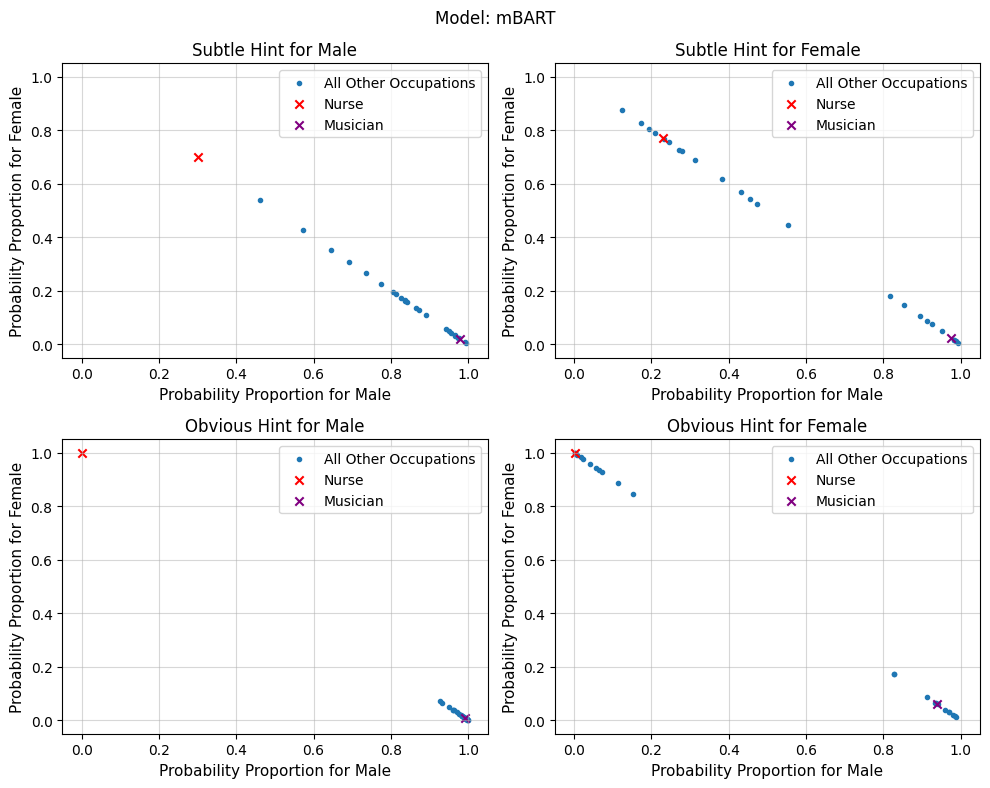

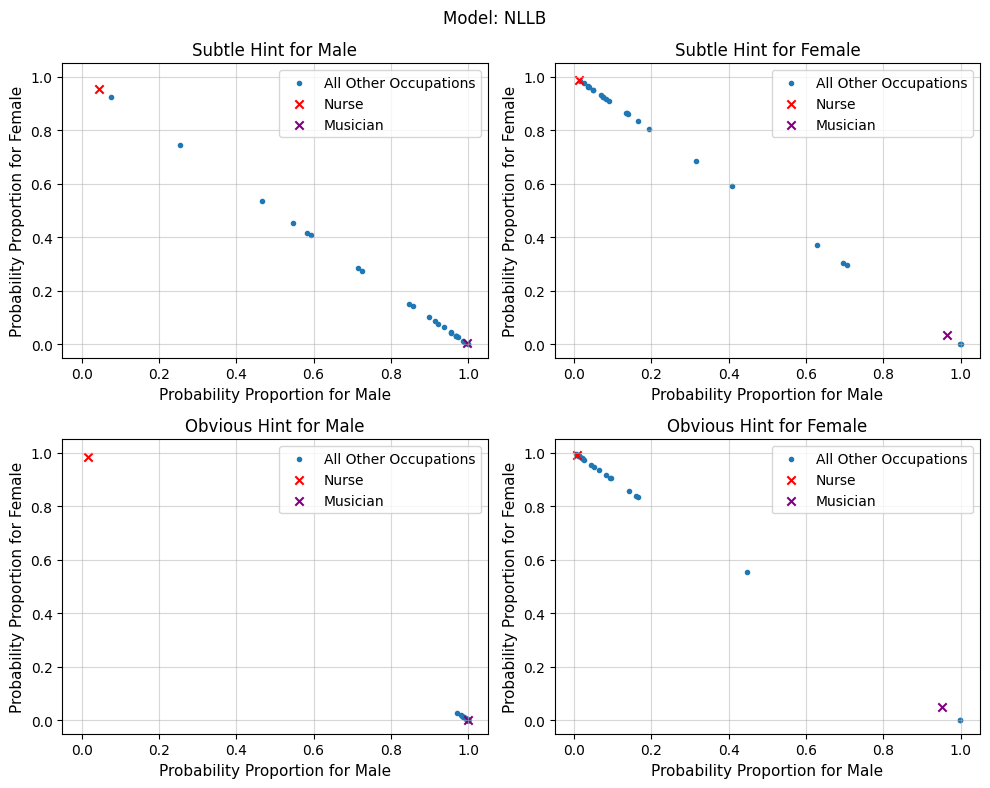

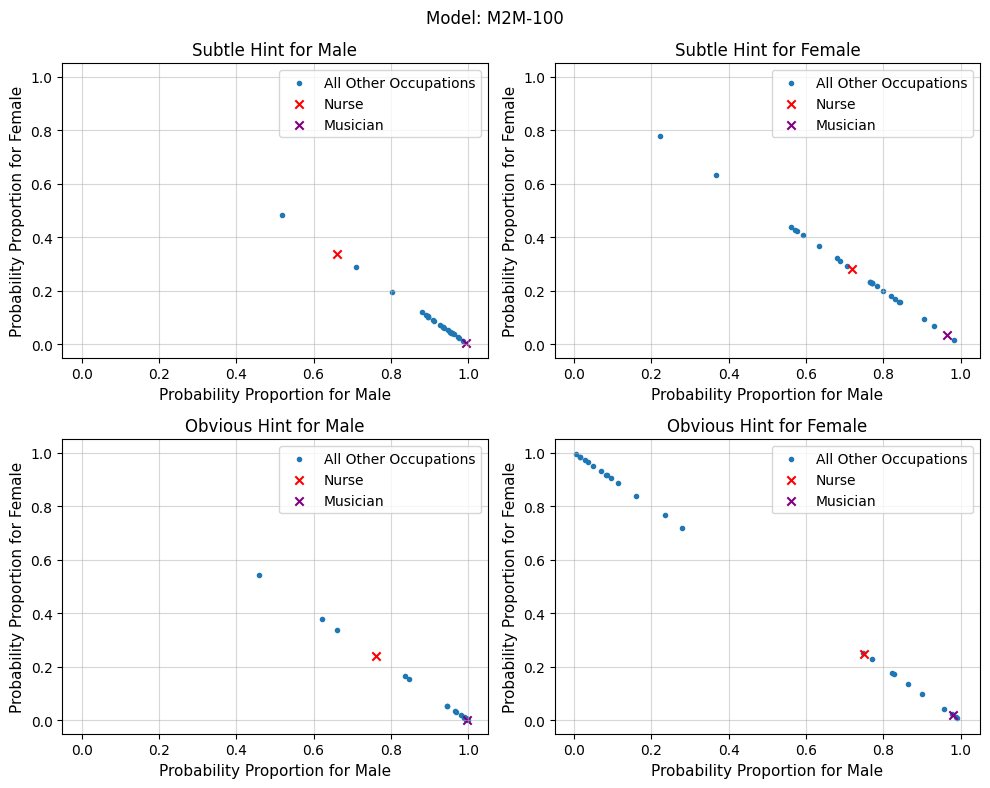

In [18]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5, 3)

def getvals(model, title = None):
    path = Path.cwd() / "probabilities" / model
    
    file = path / "Merged-Prob_bce.xlsx"
    sheets = pd.ExcelFile(file).sheet_names
    dfs = pd.read_excel(file, sheet_name=sheets)
    titles = {
        "obv (M)": "Obvious Hint for Male",
        "obv (F)": "Obvious Hint for Female",
        "nohints": "No Hint",
        "hints (M)": "Subtle Hint for Male",
        "hints (F)": "Subtle Hint for Female",
    }
    fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 8))
    pos = 0
    for sheetname, sheet in dfs.items():
        if sheetname == "nohints":
            continue

        sheet = sheet.set_index("Unnamed: 0")
        sheet = sheet.drop("loss", axis = 0)
        df = pd.DataFrame()
        df["Male"] = sheet[[i for i in sheet.columns if "Male" in i]].mean(axis = 1)
        df["Female"] = sheet[[i for i in sheet.columns if "Female" in i]].mean(axis = 1)
        male = df["Male"]
        female = df["Female"]
        nurse = (male["Nurse"], female["Nurse"])
        musician = (male["Musician"], female["Musician"])
        male = male.drop(["Nurse", "Musician"])
        female = female.drop(["Nurse", "Musician"])

        df["Male"] = sheet[[i for i in sheet.columns if "Male" in i]].mean(axis = 1)
        df["Female"] = sheet[[i for i in sheet.columns if "Female" in i]].mean(axis = 1)
        axs[pos // 2, pos % 2].grid(alpha = 0.5)
        axs[pos // 2, pos % 2].scatter(male, female, marker = ".", label = "All Other Occupations")
        axs[pos // 2, pos % 2].scatter(*nurse, marker = "x", c = "red", label = "Nurse")
        axs[pos // 2, pos % 2].scatter(*musician, marker = "x", c = "purple", label = "Musician")
        axs[pos // 2, pos % 2].set_title(titles[sheetname])
        axs[pos // 2, pos % 2].set_xlabel("Probability Proportion for Male",   fontsize = 11)
        axs[pos // 2, pos % 2].set_ylabel("Probability Proportion for Female", fontsize = 11)
        axs[pos // 2, pos % 2].set_xlim((-0.05, 1.05))
        axs[pos // 2, pos % 2].set_ylim((-0.05, 1.05))
        axs[pos // 2, pos % 2].legend()
        pos += 1

    plt.suptitle(f"Model: {title}")
    plt.tight_layout()
    plt.show()

getvals("mbart", title = "mBART")
getvals("nllb", title = "NLLB")
getvals("m2m-100", title = "M2M-100")
   
